In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset
data=pd.read_csv("data/NF-UQ-NIDS.csv")

In [3]:
# Count the occurrences of each attack type
value_counts=data['Attack'].value_counts()

# Get the overall class distribution
overall_label=['Benign', 'Attack']
overall_count=[value_counts['Benign'], (len(data) - value_counts['Benign'])]

# Get the attack subclass distribution
attack_label=value_counts.index[1:]
attack_count=value_counts.values[1:]

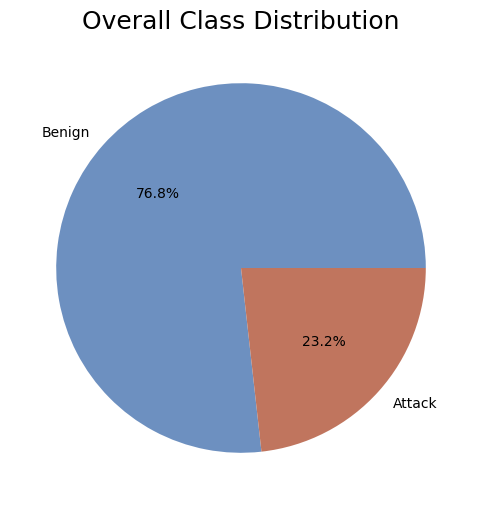

In [4]:
##### ----- Overall Class Distribution ----- #####
# Figure
fig, ax = plt.subplots(figsize=(6,6))

# Make figure and assign axis objects
ax.pie(overall_count, autopct='%1.1f%%', labels=overall_label, colors=plt.cm.twilight(np.linspace(.2, .8, 2)))
ax.set_title("Overall Class Distribution", fontsize=18)
plt.show()

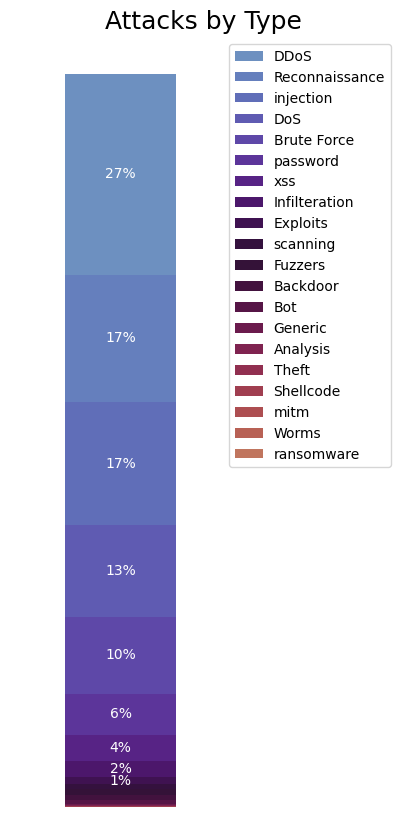

In [5]:
##### ----- Attack Class Distribution ----- #####
# make figure and assign axis objects
fig, ax = plt.subplots(1, figsize=(5, 10))
# bar chart parameters
bottom=1
width=.2

# Colors
color = plt.cm.twilight(np.linspace(.2, .8, len(attack_label)))

# Add attack types
for j, (height, label) in enumerate([*zip(attack_count, attack_label)]):
    bottom -= height
    bc = ax.bar(0, height, width, bottom=bottom, label=label, color=color[j])
    if j < 9:
        ax.bar_label(bc, labels=[f"{height/overall_count[1]:.0%}"], label_type='center', color='white')

ax.set_title('Attacks by Type', fontsize=18)
ax.legend()
ax.axis('off')
ax.set_xlim(-width, 2.5 * width)

plt.show()

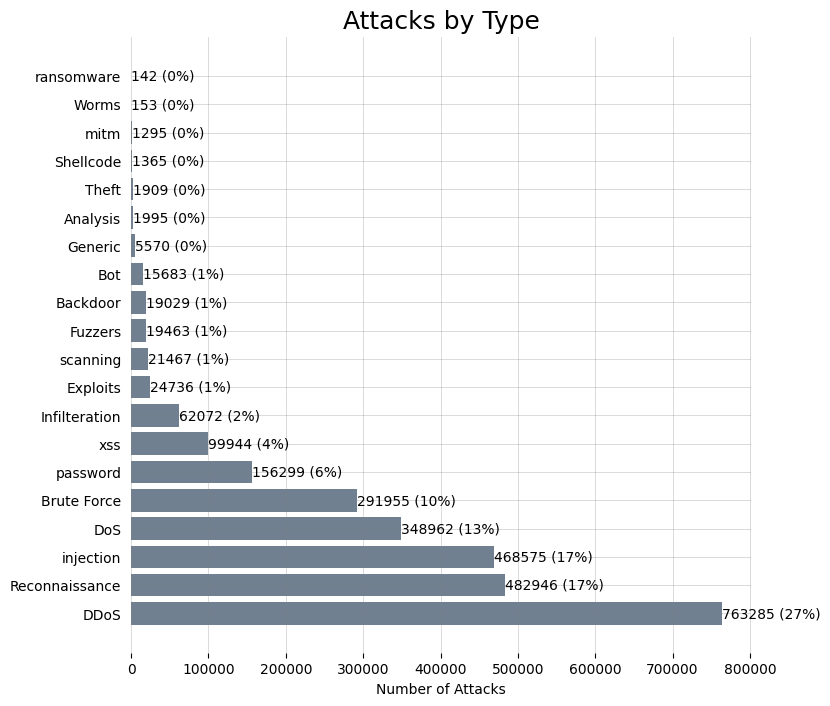

In [6]:
##### ----- Attack Class Distribution ----- #####
# Figure
fig, ax = plt.subplots(figsize=(8,8))

# Horizontal bar plot
ax.barh(attack_label, attack_count, align='center', color='slategray')

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove y ticks
ax.yaxis.set_ticks_position('none')

# Add grid lines
ax.grid(visible=True, color ='grey', linestyle ='-', linewidth=0.5, alpha=0.4)

# Add number and percentage labels
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.25, str(f"{i.get_width()} ({i.get_width()/overall_count[1]:.0%})"))

ax.set_title('Attacks by Type', fontsize=18)
ax.set_xlabel('Number of Attacks')

plt.show()